<a href="https://colab.research.google.com/github/Ujjwal-Modi/Global-AI-Job-Market-Trends-Salary-Insights-2025/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv("ai_job_dataset.csv")

In [5]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [6]:
# 2. Prepare Data
# Drop rows with missing target or key features
df = df.dropna(subset=['salary_usd', 'job_title', 'experience_level', 'employment_type'])

# Define features and regression target
features = [
    'job_title', 'experience_level', 'employment_type', 'company_location',
    'company_size', 'employee_residence', 'remote_ratio', 'education_required',
    'years_experience', 'industry'
]
target = 'salary_usd'

df_model = df[features + [target]].copy()

# Encode categorical features
label_encoders = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Train-Test Split
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# 3. Define Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

In [15]:
# 4. Train, Predict & Evaluate

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)          # Mean Squared Error
    rmse = np.sqrt(mse)                               # Root Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)        # Mean Absolute Error
    r2 = r2_score(y_test, y_pred)                    # R² score

    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 4854, number of used features: 10
[LightGBM] [Info] Start training from score 116422.229707
               Model           MSE          RMSE           MAE        R2
8           LightGBM  4.198638e+08  20490.577360  14759.385168  0.887536
9           CatBoost  4.280778e+08  20690.040474  14920.091331  0.885336
4  Gradient Boosting  4.283886e+08  20697.550503  14922.409323  0.885253
3      Random Forest  4.533430e+08  21291.854027  15340.893353  0.878569
7            XGBoost  4.935841e+08  22216.753318  15958.958984  0.867790
2              Lasso  1.410786e+09  37560.429840  26955.894601  0.622111
0  Linear Regression  1.410786e+09  37560.437135  26955.899677  0.622111
1      

In [16]:
# 5. Results Comparison
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model           MSE          RMSE           MAE        R2
8           LightGBM  4.198638e+08  20490.577360  14759.385168  0.887536
9           CatBoost  4.280778e+08  20690.040474  14920.091331  0.885336
4  Gradient Boosting  4.283886e+08  20697.550503  14922.409323  0.885253
3      Random Forest  4.533430e+08  21291.854027  15340.893353  0.878569
7            XGBoost  4.935841e+08  22216.753318  15958.958984  0.867790
2              Lasso  1.410786e+09  37560.429840  26955.894601  0.622111
0  Linear Regression  1.410786e+09  37560.437135  26955.899677  0.622111
1              Ridge  1.410788e+09  37560.453530  26955.892143  0.622110
5                KNN  1.449400e+09  38070.982798  27268.965898  0.611768
6                SVR  3.938100e+09  62754.286072  45726.588179 -0.054849


/tmp/ipython-input-1910620460.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df_sorted, palette='Blues_d')
/tmp/ipython-input-1910620460.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df_sorted, palette='Reds_d')
/tmp/ipython-input-1910620460.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results_df_sorted, palette='Greens_d')


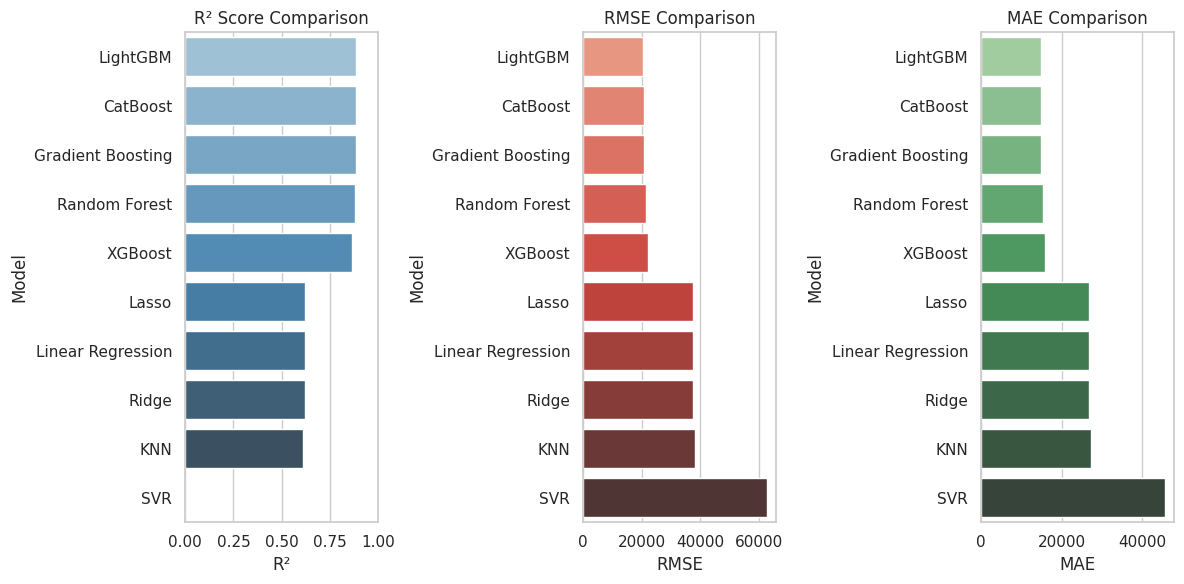

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure results_df is sorted by R² for better visualization
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# --------------------------
# R² Comparison
# --------------------------
plt.subplot(1, 3, 1)
sns.barplot(x='R2', y='Model', data=results_df_sorted, palette='Blues_d')
plt.title('R² Score Comparison')
plt.xlim(0, 1)
plt.xlabel('R²')

# --------------------------
# RMSE Comparison
# --------------------------
plt.subplot(1, 3, 2)
sns.barplot(x='RMSE', y='Model', data=results_df_sorted, palette='Reds_d')
plt.title('RMSE Comparison')
plt.xlabel('RMSE')

# --------------------------
# MAE Comparison
# --------------------------
plt.subplot(1, 3, 3)
sns.barplot(x='MAE', y='Model', data=results_df_sorted, palette='Greens_d')
plt.title('MAE Comparison')
plt.xlabel('MAE')

plt.tight_layout()
plt.show()

In [20]:
!pip install scikit-optimize

# Hyperparameter Tunning(BayesSearchCV)

In [21]:
# Hyperparameter Tunning

from skopt import BayesSearchCV
from lightgbm import LGBMRegressor

param_space = {
    'num_leaves': (20, 150),
    'max_depth': (3, 15),
    'learning_rate': (0.001, 0.3, 'log-uniform'),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

bayes_lgbm = BayesSearchCV(
    estimator=LGBMRegressor(),
    search_spaces=param_space,
    n_iter=30,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0,
    random_state=42
)
bayes_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 4854, number of used features: 10
[LightGBM] [Info] Start training from score 116422.229707


BayesSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=30, n_jobs=-1,
              random_state=42, scoring='r2',
              search_spaces={'colsample_bytree': (0.5, 1.0),
                             'learning_rate': (0.001, 0.3, 'log-uniform'),
                             'max_depth': (3, 15), 'n_estimators': (100, 1000),
                             'num_leaves': (20, 150), 'subsample': (0.5, 1.0)})

In [22]:
# ---------------------------
# Best estimator and parameters
# ---------------------------
best_lgbm = bayes_lgbm.best_estimator_
print("Best Parameters (LightGBM):", bayes_lgbm.best_params_)
print("Best CV R² Score (LightGBM):", bayes_lgbm.best_score_)

Best Parameters (LightGBM): OrderedDict({'colsample_bytree': 1.0, 'learning_rate': 0.018641153247326576, 'max_depth': 15, 'n_estimators': 408, 'num_leaves': 20, 'subsample': 1.0})
Best CV R² Score (LightGBM): 0.8782933192030979


In [23]:
# ---------------------------
# Predictions
# ---------------------------
y_pred = best_lgbm.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ---------------------------
# Store results
# ---------------------------
results = pd.DataFrame([{
    "Model": "LightGBM (BayesSearchCV)",
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R2": r2,
    "Best_Params": bayes_lgbm.best_params_
}])

print(results)

                      Model           MSE          RMSE           MAE  \
0  LightGBM (BayesSearchCV)  4.099720e+08  20247.766462  14686.831283   

         R2                                        Best_Params  
0  0.890186  {'colsample_bytree': 1.0, 'learning_rate': 0.0...  


# Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

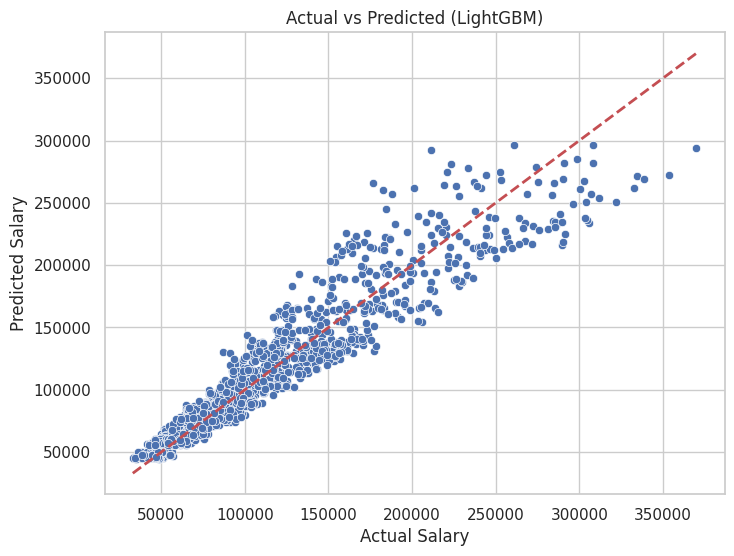

In [25]:
# Actual vs Predicted Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted (LightGBM)")
plt.show()

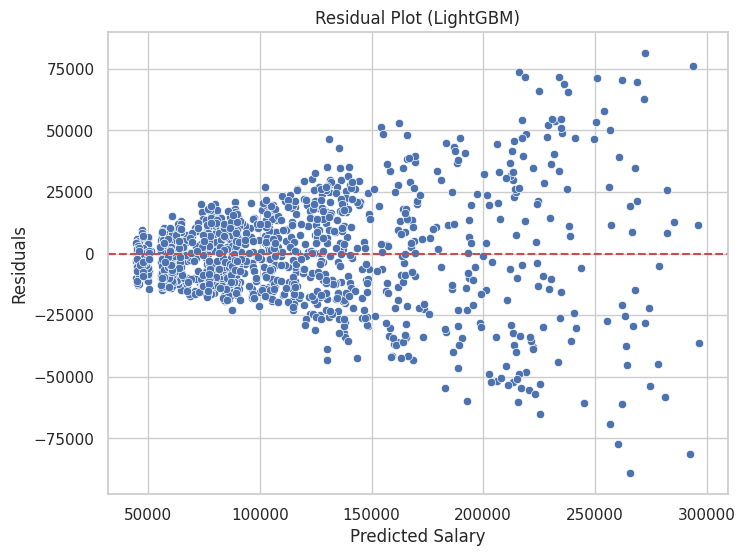

In [26]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot (LightGBM)")
plt.show()